In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
datos = pd.read_csv('data.csv')
magnitud = datos.iloc[:, 0]
funcionlum = datos.iloc[:, 1]

def	schechter(x,M,phi,alpha):
				m = 0.4*np.log(10)*phi*(10**(-0.4*(x-M)*(alpha+1)))*np.exp(-10**(-0.4*(x-M)))
				return m



erromin = datos.iloc[:, 2]
erromax = datos.iloc[:, 3]

sigma = (erromax-erromin)/2

def loglike(x, y, M, phi, alpha, sigma):
				m = schechter(x, M, phi, alpha)
				L = -(1/2) * np.sum(((y - m) / sigma) ** 2)
				return L

fiducial_M = -20.83
fiducial_phi = 1.46e-2
fiducial_alpha = -1.2

alphamin = fiducial_alpha*(1+0.1)
alphamax = fiducial_alpha*(1-0.1)
Mmin = fiducial_M*(1+0.1)
Mmax = fiducial_M*(1-0.1)
phimin = fiducial_phi*(1-0.2)
phimax = fiducial_phi*(1+0.2)

curvainferior = (-21.5,1e-2,-1.7)
curvasuperior=	(-20.20, 1.9e-2,-0.96)

def priors(params):
	if np.all(curvainferior <= params) and np.all(params <= curvasuperior):
		return 0
	else:
		return -np.inf
	
def post(x, y, M, phi, alpha, sigma):
	params = np.array([M, phi, alpha])
	prior_prob = priors(params)
	return loglike(x, y, M, phi, alpha, sigma) + prior_prob

In [9]:


m_nivel = np.linspace(curvainferior[0], curvasuperior[0], 50)
phi_nivel = np.linspace(curvainferior[1], curvasuperior[1], 50)
alpha_nivel = np.linspace(curvainferior[2], curvasuperior[2], 50)

alpha_fijo = (curvainferior[2]+curvasuperior[2])/2
phi_fijo = (curvainferior[1]+curvasuperior[1])/2
M_fijo = (curvainferior[0]+curvasuperior[0])/2


z = np.zeros((50, 50))
for i in range(50):
	for j in range(50):
				z[i, j] = post(magnitud, funcionlum, m_nivel[i], fiducial_phi, alpha_nivel[j], sigma)

z_phi_alpha = np.zeros((50, 50))
for i in range(50):
	for j in range(50):
		z_phi_alpha[i, j] = post(magnitud, funcionlum, M_fijo, phi_nivel[i], alpha_nivel[j], sigma)
				

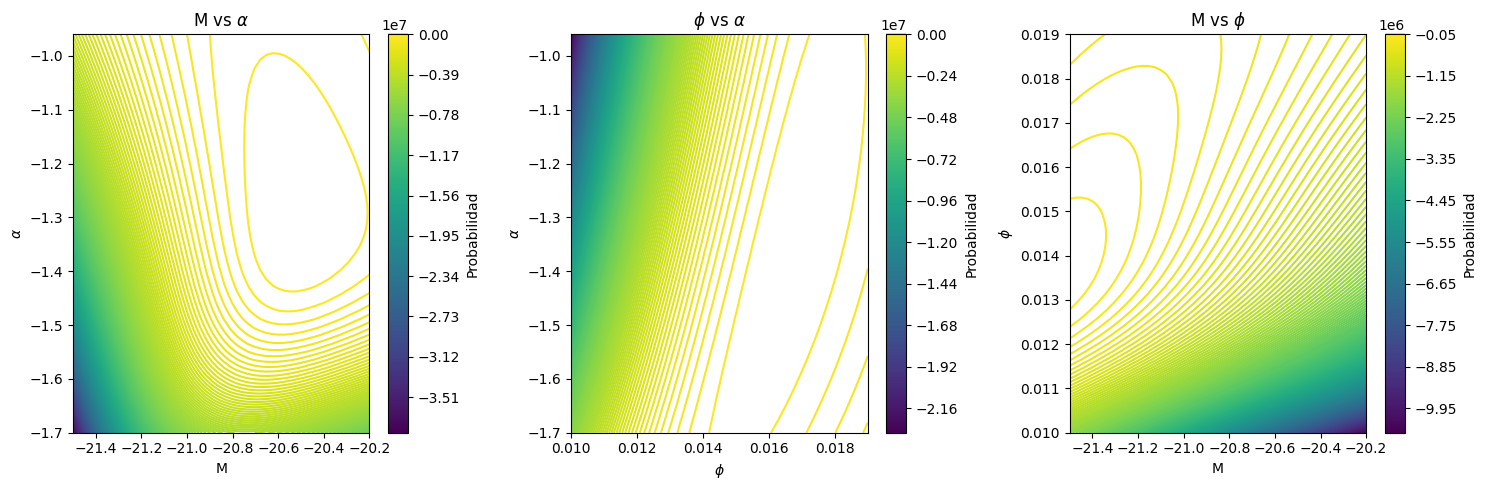

In [11]:
plt.figure(figsize=(15, 5))

# Primer gráfico
plt.subplot(1, 3, 1)
plt.contour(m_nivel, alpha_nivel, z, cmap='viridis', levels=256)
plt.colorbar(label="Probabilidad")
plt.xlabel("M")
plt.ylabel("$\\alpha$")
plt.title("M vs $\\alpha$")

# Segundo gráfico
plt.subplot(1, 3, 2)
plt.contour(phi_nivel, alpha_nivel, z_phi_alpha, cmap='viridis', levels=256)
plt.colorbar(label="Probabilidad")
plt.xlabel("$\\phi$")
plt.ylabel("$\\alpha$")
plt.title("$\\phi$ vs $\\alpha$")

# Tercer gráfico
z_m_phi = np.zeros((50, 50))
for i in range(50):
	for j in range(50):
		z_m_phi[i, j] = post(magnitud, funcionlum, m_nivel[i], phi_nivel[j], alpha_fijo, sigma)

plt.subplot(1, 3, 3)
plt.contour(m_nivel, phi_nivel, z_m_phi, cmap='viridis', levels=256)
plt.colorbar(label="Probabilidad")
plt.xlabel("M")
plt.ylabel("$\\phi$")
plt.title("M vs $\\phi$")

plt.tight_layout()
plt.show()